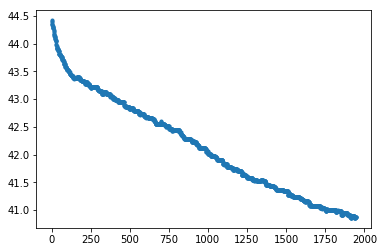

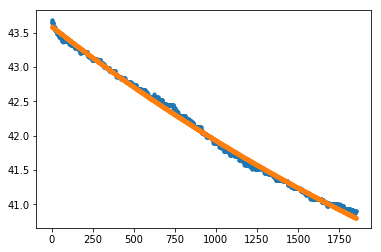

[5.86776765e+00 3.73418114e-04 3.79829666e+01]


In [34]:
guessb = 10**(-3) #b的猜測值
ac = 6 #分割找數據段數

#讀數據
import numpy as np
fp = open('5.txt','r',encoding='UTF-8')
a = []
for line in fp:
    a.append(list(line.strip('\n').split(',')))
b = a[1:]
n = 0
data= []
for x in b:
    x = float(b[n][1][5:10])
    data.append(x)
    n = n+1

#畫數據
import matplotlib.pyplot as plt
import numpy as np
l = len(data)
x = np.linspace(1,l, l)
plt.plot(x, data,'.')
plt.show()
x=np.linspace(1,l,num=l)
np_data = np.array(data)

#define fitting fuction
from scipy import optimize
def func(x, a, b, c):
    return a*np.exp(-b*x)+c

#切數據
b = []
for i in range (ac) :
    dataa=np_data[int(l/ac*i):int(l/ac*(i+1))]
    xa=x[int(l/ac*i):int(l/ac*(i+1))]
    popt, pcov = optimize.curve_fit(func, xa, dataa, maxfev=1000000, p0=(5, guessb, 40))
    b.append(popt[1])
    
#把b值好的數據拿出來
index = []
for i in range (ac):
    if((abs(b[i]) < 5*guessb)and((abs(b[i])>guessb/5))):
        index.append(i)
st = int(l/ac*max(0,(min(index)-1)))
end = int(l/ac*min(ac,(max(index)+2)))
datab = np_data[st:end]

#fit較好的數據
popt, pcov = optimize.curve_fit(func, xb, datab, maxfev=1000000, p0=(5, guessb, 40))

#去頭
datac = datab[int(len(datab)*0.02):]
xc = np.linspace(1, len(datac), len(datac))
popt1, pcov1 = optimize.curve_fit(func, xc, datac, maxfev=1000000, p0=(5, guessb, 40))
while(pcov1[1,1]<pcov[1,1]):
    pcov = pcov1
    datad = datac
    datac = datac[int(len(datac)*0.01):]
    xc = np.linspace(1, len(datac), len(datac))
    popt1, pcov1 = optimize.curve_fit(func, xc, datac, maxfev=1000000, p0=(5, guessb, 40))

#去尾
datae = datad[:int(len(datad)*0.99)]
xe = np.linspace(1, len(datae), len(datae))
popt1, pcov1 = optimize.curve_fit(func, xe, datae, maxfev=1000000, p0=(5, guessb, 40))
dataf = datae
while(pcov1[1,1]<pcov[1,1]):
    pcov = pcov1
    dataf = datae
    datae = datae[:int(len(datad)*0.99)]
    xe = np.linspace(1, len(date), len(datae))
    popt1, pcov1 = optimize.curve_fit(func, xe, datae, maxfev=1000000, p0=(5, guessb, 40))

#plot結果    
xf=np.linspace(1,len(dataf),len(dataf))
plt.plot(xf, dataf, '.')
popt1, pcov1 = optimize.curve_fit(func, xf, dataf, maxfev=1000000, p0=(5, guessb, 40))
a=popt1[0]
b=popt1[1]
c=popt1[2]
yvals1 = func(xf,a,b,c)
plt.plot(xf, yvals1,'.')
plt.show()
print(popt)